In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv('bank-additional.csv')

In [22]:
cat_to_code = data.select_dtypes(['object']).astype('category').apply(lambda x: x.cat.codes)
data[list(cat_to_code)] = cat_to_code
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [ ]:
data_train = pd.read_excel('training_data.xlsx')
data_test = pd.read_excel('testing_data.xlsx')

In [34]:
data = data.sample(frac=1)
data.head()

import numpy as np

# this sets the numpy to print numbers with float precision (this setting affects only the prints not the actual values)
np.set_printoptions(suppress=True)

xs_train, ys_train = np.split(data_train.values, [20], axis=1)

xs_test, ys_test = np.split(data_test.values, [20], axis=1)

print('training set shape:\t', xs_train.shape)
print('test set shape:\t\t', xs_test.shape)
print('training set Y shape:\t', ys_train.shape)
print('test set Y shape:\t', ys_test.shape)

NameError: name 'data_test' is not defined

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'criterion': ["gini", "entropy"],
    'max_depth': range(1, 20)}]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, verbose=2)
grid_search.fit(xs_train, ys_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini

[CV] END .....................criterion=entropy, max_depth=4; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=4; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=4; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=4; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=5; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=5; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=5; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=5; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=5; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=6; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=6; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=6; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 20)}],
             verbose=2)

In [27]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(152.45357142857142, 195.696, 'X[19] <= 5087.65\nentropy = 0.499\nsamples = 3295\nvalue = [2934, 361]'),
 Text(65.76428571428572, 152.208, 'X[10] <= 165.5\nentropy = 0.985\nsamples = 420\nvalue = [240, 180]'),
 Text(35.871428571428574, 108.72, 'X[0] <= 51.5\nentropy = 0.608\nsamples = 154\nvalue = [131, 23]'),
 Text(23.914285714285715, 65.232, 'X[16] <= 94.041\nentropy = 0.698\nsamples = 122\nvalue = [99, 23]'),
 Text(11.957142857142857, 21.744, 'entropy = 0.786\nsamples = 98\nvalue = [75, 23]'),
 Text(35.871428571428574, 21.744, 'entropy = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(47.82857142857143, 65.232, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(95.65714285714286, 108.72, 'X[12] <= 8.0\nentropy = 0.976\nsamples = 266\nvalue = [109, 157]'),
 Text(71.74285714285715, 65.232, 'X[0] <= 25.5\nentropy = 0.655\nsamples = 71\nvalue = [12, 59]'),
 Text(59.785714285714285, 21.744, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(83.7, 21.744, 'entropy = 0.597\nsamples 

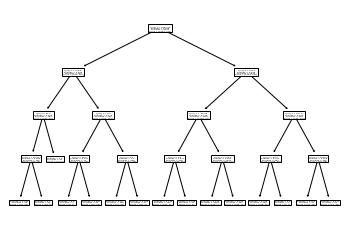

In [28]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
tree_clf.fit(xs_train, ys_train)
from sklearn.tree import plot_tree
plot_tree(tree_clf)

In [29]:
from sklearn.metrics import accuracy_score
ys_train_pred = tree_clf.predict(xs_train)

print("The train accuracy is " , accuracy_score(ys_train, ys_train_pred))

ys_test_pred = tree_clf.predict(xs_test)

print("The test accuracy is " , accuracy_score(ys_test, ys_test_pred))

The train accuracy is  0.921092564491654
The test accuracy is  0.9029126213592233
